In [ ]:
%matplotlib inline


# función logística

En el gráfico se muestra cómo sería la regresión logística, en este
conjunto de datos sintéticos, clasificar los valores como 0 o 1,
es decir, clase uno o dos, utilizando la curva logística.


In [ ]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic.html#sphx-glr-auto-examples-linear-model-plot-logistic-py
# Code source: Gael Varoquaux
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

#Buena libreria de optimización
from scipy.special import expit
from sklearn.linear_model import LinearRegression, LogisticRegression


In [ ]:
# Genere un conjunto de datos de juguete, es solo una línea recta con algo de ruido gaussiano:
xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
print(X.T)
y = (X > 0).astype(float)
X[X > 0] *= 4
print(X.T)
X += 0.3 * np.random.normal(size=n_samples)
print(X.T)
X = X[:, np.newaxis]
print(X.T)
print(y)

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877
  0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215  0.15634897
  1.23029068  1.20237985 -0.38732682 -0.30230275 -1.04855297 -1.42001794
 -1.70627019  1.9507754  -0.50965218 -0.4380743  -1.25279536  0.77749036
 -1.61389785 -0.21274028 -0.89546656  0.3869025  -0.51080514 -1.18063218
 -0.02818223  0.42833187  0.06651722  0.3024719  -0.63432209 -0.36274117
 -0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
 -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
  1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
 -0.31155253  0.05616534 -1.16514984  0.90082649  0

In [ ]:
# Ajustar el clasificador
clf = LogisticRegression(C=1e5)
clf.fit(X, y)

LogisticRegression(C=100000.0)

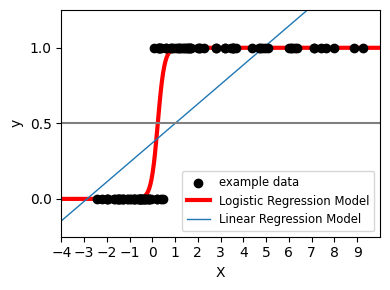

In [ ]:
# y trazar el resultado
plt.figure(1, figsize=(4, 3))
plt.clf()   # https://stackoverflow.com/questions/16661790/difference-between-plt-close-and-plt-clf
plt.scatter(X.ravel(), y, label="example data", color="black", zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, label="Logistic Regression Model", color="red", linewidth=3)

ols = LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, label="Linear Regression Model", linewidth=1)
plt.axhline(0.5, color=".5")

plt.ylabel("y")
plt.xlabel("X")
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-4, 10)
plt.legend(loc="lower right", fontsize="small")
plt.tight_layout()
plt.show()